In [1]:
from config import *

from easyric.caas_lite import TiffSpliter
from easyric.objects import Pix4D
from easyric.io import shp, geotiff, plot
from easyric.calculate import geo2raw, geo2tiff

import os
import shapefile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import shapely
import tifffile



In [180]:
import re

# read geotiff path

In [24]:
p2 = Paths("0518_p")

p4d = Pix4D(project_path=p2.pix4d_project, 
            raw_img_path=p2.raw_img, 
            project_name=p2.project_name,
            param_folder=p2.pix4d_param)

shp_file = r"Y:\hwang_Pro\data\2020_tanashi_broccoli\02_GIS\rotate_grids\split_grid_2.5m.shp"

process_area = shp.read_shp3d(shp_file, dsm_path=p4d.dsm_file, geotiff_proj=p4d.dsm_header['proj'], name_field="id", get_z_by="mean")
process_area.keys()

[Init][Pix4D] No ply given, however find 'broccoli_tanashi_5_20200518_P4M_10m_group1_densified_point_cloud.ply' at current project folder
[Init][Pix4D] No dom given, however find 'broccoli_tanashi_5_20200518_P4M_10m_transparent_mosaic_group1.tif' at current project folder
[Init][Pix4D] No dsm given, however find 'broccoli_tanashi_5_20200518_P4M_10m_dsm.tif' at current project folder
[io][geotiff][GeoCorrd] Comprehense [* 34737 geo_ascii_params (30s) b'WGS 84 / UTM zone 54N|WGS 84|'] to geotiff coordinate tag [WGS 84 / UTM zone 54N]
[io][geotiff][GeoCorrd] Comprehense [* 34737 geo_ascii_params (30s) b'WGS 84 / UTM zone 54N|WGS 84|'] to geotiff coordinate tag [WGS 84 / UTM zone 54N]
[io][geotiff][GeoCorrd] Comprehense [* 34737 geo_ascii_params (30s) b'WGS 84 / UTM zone 54N|WGS 84|'] to geotiff coordinate tag [WGS 84 / UTM zone 54N]
[io][shp][fields] Shp fields: {'id': 0, 'left': 1, 'top': 2, 'right': 3, 'bottom': 4}
[io][shp][proj] find ESRI projection file Y:\hwang_Pro\data\2020_tanashi

dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157'

In [27]:
process_area["106"][:,0:2]

array([[ 368070.55299807, 3956061.65272126],
       [ 368073.00064364, 3956062.16167231],
       [ 368073.50959469, 3956059.71402674],
       [ 368071.06194912, 3956059.2050757 ],
       [ 368070.55299807, 3956061.65272126]])

# read privous csv file

In [18]:
before_project = pd.read_csv(r"Y:\hwang_Pro\data\2020_tanashi_broccoli\13_roi_on_raw\broccoli_tanashi_5_20200518_P4M_10m.csv")
before_project

,id,image,xc,yc,dist,angle,select,roi,offset_x,offset_y
0,1,DJI_0482.JPG,1471.503070,1050.479710,1482.324568,238.544967,False,[[1017.88848378 486.84575251]\n [2033.1142722...,722,300
1,1,DJI_0483.JPG,1367.806110,1861.314437,1368.702630,271.562227,False,[[ 912.62263012 1292.33827373]\n [1935.3219062...,618,1111
2,1,DJI_0484.JPG,1267.481445,2695.976884,1707.890639,300.700992,False,[[ 809.77402199 2129.89927139]\n [1834.5578643...,517,1946
3,1,DJI_0485.JPG,1192.032543,3046.014704,1969.049376,308.360804,False,[[ 736.3315599 2483.86442861]\n [1756.7038347...,442,2296
4,1,DJI_0487.JPG,2476.126368,2312.642055,553.448608,331.994694,True,[[2018.29623384 1747.27697718]\n [3043.9597271...,1726,1563
...,...,...,...,...,...,...,...,...,...,...
3960,336,DJI_0127.JPG,3301.234760,1790.076662,566.251823,93.434565,True,[[2872.27923455 1254.41892046]\n [3835.7417239...,2551,1040
3961,336,DJI_0128.JPG,3368.364558,992.295775,1044.804696,142.753406,False,[[2938.01712463 455.48398003]\n [3899.9432175...,2618,242
3962,336,DJI_0136.JPG,4479.521140,1121.361260,1879.778488,111.949427,False,[[4048.69637822 580.53216941]\n [5010.2803002...,3730,371
3963,336,DJI_0137.JPG,4402.697996,1904.651399,1668.648213,87.229622,False,[[3977.07202399 1372.71237571]\n [4930.5217607...,3653,1155


In [25]:
before_project[(before_project.id == 106) & (before_project.image == demo_json[1])].roi

1118    [[2233.37806606 1777.93615939]\n [3234.1863269...
Name: roi, dtype: object

In [183]:
def get_grid_roi_info(df_csv, id, image_name):
    filtered = df_csv[(df_csv.id == id) & (df_csv.image == image_name)]
    roi_str = filtered.roi.values[0]
    roi_str = roi_str.replace("\n ", ",")
    roi_str = re.sub("\s+", ",", roi_str)
    roi_np = np.asarray(eval(roi_str))
    off_x = filtered.offset_x.values[0]
    off_y = filtered.offset_y.values[0]
    
    return roi_np, off_x, off_y

In [184]:
roi_np, off_x, off_y = get_grid_roi_info(before_project, 106, demo_json[1])
roi_np, off_x, off_y

(array([[2233.37806606, 1777.93615939],
        [3234.18632697, 1916.53482503],
        [3093.79701337, 2911.46368475],
        [2095.37524041, 2777.08038253],
        [2233.37806606, 1777.93615939]]),
 1915,
 1595)

# read detected json file

In [20]:
demo_path = r"Y:\hwang_Pro\data\2020_tanashi_broccoli\13_roi_on_raw\verify"
demo_json = ["DJI_0356.JPG", "DJI_0360.JPG", "DJI_0361.JPG"]

In [3]:
import json

In [14]:
def read_json(json_path):
    container = []
    with open(json_path, "r", encoding="utf-8") as f:
        js = json.loads(f.read())
        for item in js["shapes"]:
            points = np.asarray(item["points"])
            points = np.append(points, points[0,:][None,:], axis=0)
            container.append(points)
    return container

In [19]:
def json_name(date, roi_id, file_name):
    return f"{date}_{roi_id}_{file_name[:-4]}.json"

In [22]:
demo_json1 = read_json(os.path.join(demo_path, json_name(20200518, 106, demo_json[1])))
demo_json1[0]

array([[ 34.3, 776.7],
       [ 40.8, 774.7],
       [ 46.8, 768.7],
       [ 49.6, 774.6],
       [ 52.5, 783.6],
       [ 55. , 791.6],
       [ 52.7, 795.5],
       [ 46.6, 797.7],
       [ 37.9, 794.3],
       [ 30.7, 788.2],
       [ 34.8, 783.8],
       [ 32.5, 779.8],
       [ 34.3, 776.7]])

## correct detect json offsets

In [57]:
detect_on_img1 = []
for roi in demo_json1:
    detect_on_img1.append(roi + np.asarray([off_x, off_y]))
    
detect_on_img1[0]

array([[1949.3, 2371.7],
       [1955.8, 2369.7],
       [1961.8, 2363.7],
       [1964.6, 2369.6],
       [1967.5, 2378.6],
       [1970. , 2386.6],
       [1967.7, 2390.5],
       [1961.6, 2392.7],
       [1952.9, 2389.3],
       [1945.7, 2383.2],
       [1949.8, 2378.8],
       [1947.5, 2374.8],
       [1949.3, 2371.7]])

## plot show

In [62]:
p4d.img[demo_json[1]].path

'Y:\\hwang_Pro\\data\\2020_tanashi_broccoli\\00_rgb_raw\\broccoli_tanashi_5_20200518_P4M_10m\\DJI_0360.JPG'

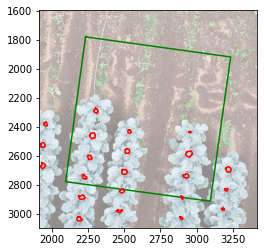

In [72]:
plt.imshow(plt.imread(p4d.img[demo_json[1]].path), alpha=0.5)
plt.plot(*roi_np.T, c="g")
for roi in detect_on_img1:
    plt.plot(*roi.T, c='r')
    
plt.xlim(off_x, off_x+1500)
plt.ylim(off_y, off_y+1500)
plt.gca().invert_yaxis()

## filter "in" polygon

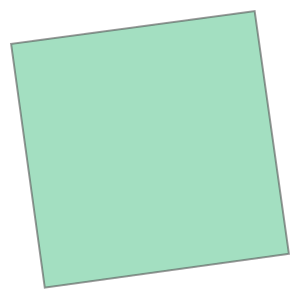

In [67]:
grid_poly = shapely.geometry.Polygon(roi_np)
grid_poly

In [74]:
shapely_detect_in = []
shapely_detect_out = []
for i, roi in enumerate(detect_on_img1):
    roi_spy = shapely.geometry.Polygon(roi)
    if roi_spy.intersects(grid_poly):
        shapely_detect_in.append(i)
    else:
        shapely_detect_out.append(i)
        
len(shapely_detect_in)

12

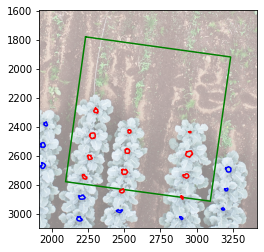

In [75]:
plt.imshow(plt.imread(p4d.img[demo_json[1]].path), alpha=0.5)
plt.plot(*roi_np.T, c="g")
for roi_id in shapely_detect_in:
    plt.plot(*detect_on_img1[roi_id].T, c='r')
for roi_id in shapely_detect_out:
    plt.plot(*detect_on_img1[roi_id].T, c='b')
    
plt.xlim(off_x, off_x+1500)
plt.ylim(off_y, off_y+1500)
plt.gca().invert_yaxis()

## exempt touch bottom & right boundary

In [76]:
roi_np[:-1, :]

array([[2233.37806606, 1777.93615939],
       [3234.18632697, 1916.53482503],
       [3093.79701337, 2911.46368475],
       [2095.37524041, 2777.08038253]])

In [79]:
def mk_rm_line(bound_np, rm_bound_id):
    bound_np = bound_np[:-1, :]
    
    return shapely.geometry.LineString(bound_np[rm_bound_id-1:rm_bound_id+2,:])

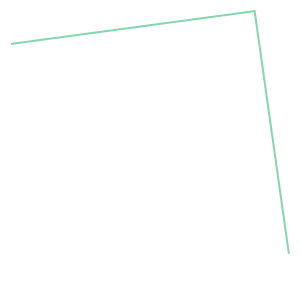

In [82]:
rm_line = mk_rm_line(roi_np, 2)
rm_line

In [83]:
shapely_detect_in = []
shapely_detect_out = []
for i, roi in enumerate(detect_on_img1):
    roi_spy = shapely.geometry.Polygon(roi)
    if roi_spy.intersects(rm_line):
        shapely_detect_out.append(i)
    else:
        if roi_spy.intersects(grid_poly):
            shapely_detect_in.append(i)
        else:
            shapely_detect_out.append(i)
        
len(shapely_detect_in)

10

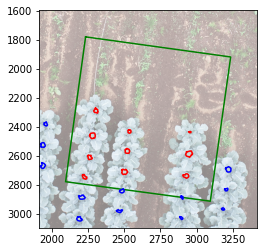

In [84]:
plt.imshow(plt.imread(p4d.img[demo_json[1]].path), alpha=0.5)
plt.plot(*roi_np.T, c="g")
for roi_id in shapely_detect_in:
    plt.plot(*detect_on_img1[roi_id].T, c='r')
for roi_id in shapely_detect_out:
    plt.plot(*detect_on_img1[roi_id].T, c='b')
    
plt.xlim(off_x, off_x+1500)
plt.ylim(off_y, off_y+1500)
plt.gca().invert_yaxis()

In [87]:
roi_np

array([[2233.37806606, 1777.93615939],
       [3234.18632697, 1916.53482503],
       [3093.79701337, 2911.46368475],
       [2095.37524041, 2777.08038253],
       [2233.37806606, 1777.93615939]])

# <s>reproject to DOM coordiantes</s>

In [161]:
# https://stackoverflow.com/questions/27546081/determining-a-homogeneous-affine-transformation-matrix-from-six-points-in-3d-usi
def recover_homogenous_affine_transformation(p, p_prime):
    '''
    Find the unique homogeneous affine transformation that
    maps a set of 3 points to another set of 3 points in 3D
    space:

        p_prime == np.dot(p, R) + t

    where `R` is an unknown rotation matrix, `t` is an unknown
    translation vector, and `p` and `p_prime` are the original
    and transformed set of points stored as row vectors:

        p       = np.array((p1,       p2,       p3))
        p_prime = np.array((p1_prime, p2_prime, p3_prime))

    The result of this function is an augmented 4-by-4
    matrix `A` that represents this affine transformation:

        np.column_stack((p_prime, (1, 1, 1))) == \
            np.dot(np.column_stack((p, (1, 1, 1))), A)

    Source: https://math.stackexchange.com/a/222170 (robjohn)
    '''

    # construct intermediate matrix
    Q       = p[1:]       - p[0]
    Q_prime = p_prime[1:] - p_prime[0]

    # calculate rotation matrix
    R = np.dot(np.linalg.inv(np.row_stack((Q, np.cross(*Q)))),
               np.row_stack((Q_prime, np.cross(*Q_prime))))

    # calculate translation vector
    t = p_prime[0] - np.dot(p[0], R)

    # calculate affine transformation matrix
    return np.column_stack((np.row_stack((R, t)),
                            (0, 0, 0, 1))).T

In [122]:
a = np.array(((1.0,1.0,1.0),
              (1.0,2.0,1.0),
              (1.0,1.0,2.0)))
a_prime = np.array(((2.4142135623730940, 5.732050807568877, 0.7320508075688767),
                    (2.7677669529663684, 6.665063509461097, 0.6650635094610956),
                    (2.7677669529663675, 5.665063509461096, 1.6650635094610962)))
tsf = recover_homogenous_affine_transformation(a, a_prime)
tsf

array([[ 0.8660254 ,  0.35355339,  0.35355339,  0.84108138],
       [-0.35355339,  0.9330127 , -0.0669873 ,  5.21957879],
       [-0.35355339, -0.0669873 ,  0.9330127 ,  0.21957879],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [123]:
a4 = np.insert(a, 3, 1, axis=1)
a4

array([[1., 1., 1., 1.],
       [1., 2., 1., 1.],
       [1., 1., 2., 1.]])

In [124]:
a4.dot(tsf.T) 

array([[2.41421356, 5.73205081, 0.73205081, 1.        ],
       [2.76776695, 6.66506351, 0.66506351, 1.        ],
       [2.76776695, 5.66506351, 1.66506351, 1.        ]])

In [126]:
tsf_r = np.linalg.inv(tsf)
tsf_r

array([[ 0.8660254 , -0.35355339, -0.35355339,  1.19463477],
       [ 0.35355339,  0.9330127 , -0.0669873 , -5.1525915 ],
       [ 0.35355339, -0.0669873 ,  0.9330127 , -0.1525915 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [127]:
a_prime4 = np.insert(a_prime, 3, 1, axis=1)
a_prime4

array([[2.41421356, 5.73205081, 0.73205081, 1.        ],
       [2.76776695, 6.66506351, 0.66506351, 1.        ],
       [2.76776695, 5.66506351, 1.66506351, 1.        ]])

In [128]:
a_prime4.dot(tsf_r.T) 

array([[1., 1., 1., 1.],
       [1., 2., 1., 1.],
       [1., 1., 2., 1.]])

---
## <s>make a usable class</s>

In [162]:
class HomoTransMatrix():
    
    def __init__(self, p, p_prime):
        _, self.dim = p.shape
        if self.dim == 2:
            p = self.add_homo(p, self.dim, 0)
            p_prime = self.add_homo(p_prime, self.dim, 0)
        print(p, p_prime)
        self.pmat = recover_homogenous_affine_transformation(p, p_prime)
        self.pmat_rev = np.linalg.inv(self.pmat)
        
    
    def recover_homogenous_affine_transformation(p, p_prime):
        '''
        Find the unique homogeneous affine transformation that
        maps a set of 3 points to another set of 3 points in 3D
        space:

            p_prime == np.dot(p, R) + t

        where `R` is an unknown rotation matrix, `t` is an unknown
        translation vector, and `p` and `p_prime` are the original
        and transformed set of points stored as row vectors:

            p       = np.array((p1,       p2,       p3))
            p_prime = np.array((p1_prime, p2_prime, p3_prime))

        The result of this function is an augmented 4-by-4
        matrix `A` that represents this affine transformation:

            np.column_stack((p_prime, (1, 1, 1))) == \
                np.dot(np.column_stack((p, (1, 1, 1))), A)

        Source: https://math.stackexchange.com/a/222170 (robjohn)
        '''
        # rotate np.array((p1, p2, p3)) -> np.array([p1, 
        #                                            p2, 
        #                                            p3])
        p = p.T
        p_prime = p_prime.T

        # construct intermediate matrix
        Q       = p[1:]       - p[0]
        Q_prime = p_prime[1:] - p_prime[0]
        
        print(Q, np.cross(*Q))

        # calculate rotation matrix
        R = np.dot(np.linalg.inv(np.row_stack((Q, np.cross(*Q)))),
                   np.row_stack((Q_prime, np.cross(*Q_prime))))

        # calculate translation vector
        t = p_prime[0] - np.dot(p[0], R)

        # calculate affine transformation matrix
        return np.column_stack((np.row_stack((R, t)),
                                (0, 0, 0, 1))).T
    
    def origin2target(self, origin_mat):
        _, dim = origin_mat.shape
        if dim == 2:
            origin_mat = self.add_homo(origin_mat)
        mat4 = self.add_homo(origin_mat)
        result = mat4.dot(self.pmat.T) 

        return result[:,0:dim]
    
    def target2origin(self, target_mat):
        _, dim = target_mat.shape
        if dim == 2:
            target_mat = self.add_homo(target_mat)
        mat4 = self.add_homo(target_mat)
        result = mat4.dot(self.pmat_rev.T) 
        return result[:,0:dim]
    
    @staticmethod
    def add_homo(mat, col_num=3, value=1):
        return np.insert(mat, col_num, value, axis=1)

In [152]:
homo_mat = HomoTransMatrix(a, a_prime)

homo_mat.origin2target(a)

array([[2.41421356, 5.73205081, 0.73205081],
       [2.76776695, 6.66506351, 0.66506351],
       [2.76776695, 5.66506351, 1.66506351]])

In [153]:
homo_mat.target2origin(a_prime)

array([[1., 1., 1.],
       [1., 2., 1.],
       [1., 1., 2.]])

In [163]:
homo_mat2d = HomoTransMatrix(a[:,0:2], a_prime[:,0:2])
#homo_mat2d.origin2target(a[:,0:2])

[[1. 1. 0.]
 [1. 2. 0.]
 [1. 1. 0.]] [[2.41421356 5.73205081 0.        ]
 [2.76776695 6.66506351 0.        ]
 [2.76776695 5.66506351 0.        ]]
[[0. 1. 0.]
 [0. 0. 0.]] [0. 0. 0.]


LinAlgError: Singular matrix

---
## Actual application demo

In [175]:
roi_np

array([[2233.37806606, 1777.93615939],
       [3234.18632697, 1916.53482503],
       [3093.79701337, 2911.46368475],
       [2095.37524041, 2777.08038253],
       [2233.37806606, 1777.93615939]])

In [89]:
process_area["106"][:,0:2]-p4d.offset.np[0:2]

array([[-13.44700193,  25.65272126],
       [-10.99935636,  26.16167231],
       [-10.49040531,  23.71402674],
       [-12.93805088,  23.2050757 ],
       [-13.44700193,  25.65272126]])

In [145]:
process_area["106"][0:3,0:2].shape

(3, 2)

In [164]:
from skimage.transform import ProjectiveTransform

In [176]:
pt = ProjectiveTransform()
pt.estimate(process_area["106"][:,0:2] - p4d.offset.np[0:2], roi_np)
pt.params

array([[ 3.85024112e+02,  1.33787696e+02,  3.97274666e+03],
       [ 1.38810587e+02, -3.81555793e+02,  1.34276641e+04],
       [ 1.73816234e-03, -8.32555222e-04,  1.04202913e+00]])

In [178]:
pt.inverse(roi_np) + p4d.offset.np[0:2]

array([[ 368070.55299807, 3956061.65272126],
       [ 368073.00064364, 3956062.16167231],
       [ 368073.50959469, 3956059.71402674],
       [ 368071.06194912, 3956059.2050757 ],
       [ 368070.55299807, 3956061.65272126]])

# deal with one plot

```python
demo_path = r"Y:\hwang_Pro\data\2020_tanashi_broccoli\13_roi_on_raw\verify"
demo_json = ["DJI_0356.JPG", "DJI_0360.JPG", "DJI_0361.JPG"]
```

In [ ]:
from skimage.transform import ProjectiveTransform

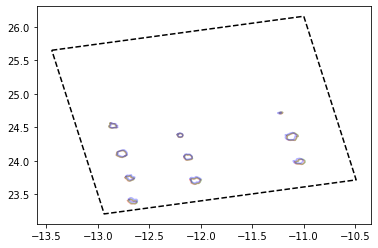

In [193]:
before_project = pd.read_csv(r"Y:\hwang_Pro\data\2020_tanashi_broccoli\13_roi_on_raw\broccoli_tanashi_5_20200518_P4M_10m.csv")

detected_merge_poly = []

# plot
color = ["r", "g", "b"]
new = process_area["106"][:,0:2] - p4d.offset.np[0:2]
plt.plot(*new.T, 'k--')

for k, img_n in enumerate(demo_json):
    roi_np, off_x, off_y = get_grid_roi_info(before_project, 106, img_n)
    detect_poly = read_json(os.path.join(demo_path, json_name(20200518, 106, img_n)))
    
    # correct json offsets
    detect_poly_correct = []
    for roi in demo_json1:
        detect_poly_correct.append(roi + np.asarray([off_x, off_y]))
        
    # filter in broccolis
    grid_poly = shapely.geometry.Polygon(roi_np)
    rm_line = mk_rm_line(roi_np, 2)
    
    shapely_detect_in = []
    shapely_detect_out = []
    for i, roi in enumerate(detect_poly_correct):
        roi_spy = shapely.geometry.Polygon(roi)
        if roi_spy.intersects(rm_line):
            shapely_detect_out.append(i)
        else:
            if roi_spy.intersects(grid_poly):
                shapely_detect_in.append(i)
            else:
                shapely_detect_out.append(i)

    # reverse to dom coords
    pt = ProjectiveTransform()
    pt.estimate(process_area["106"][:,0:2] - p4d.offset.np[0:2], roi_np)
    for idx in shapely_detect_in:
        inv_np = pt.inverse(detect_poly_correct[idx])
        detected_merge_poly.append(inv_np)
    
        # plot
        plt.plot(*inv_np.T, f"{color[k]}-", alpha=0.3)

# merge multiple to one

In [196]:
from shapely.ops import cascaded_union

In [194]:
spy_polys = [shapely.geometry.Polygon(p) for p in detected_merge_poly]

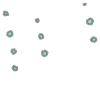

In [198]:
merged_shply = cascaded_union(spy_polys)
merged_shply

In [200]:
type(merged_shply)

shapely.geometry.multipolygon.MultiPolygon

In [201]:
len(merged_shply)

10

---
## judge if cover roots

# draw binary images for regrion props

In [221]:
for k in merged_shply:
    x, y = k.exterior.coords.xy
    points = np.vstack([x,y]).T
    print(points)
    break

[[-12.7101375   23.40471931]
 [-12.70195018  23.41590668]
 [-12.69634474  23.41947039]
 [-12.69957616  23.42911308]
 [-12.6915498   23.44007945]
 [-12.6782567   23.44851743]
 [-12.6693772   23.44193836]
 [-12.66177078  23.438981  ]
 [-12.65530162  23.4259169 ]
 [-12.64522594  23.42038432]
 [-12.63434187  23.42233766]
 [-12.6232459   23.42279994]
 [-12.61728125  23.41206184]
 [-12.61501677  23.39939462]
 [-12.6202963   23.39216096]
 [-12.61906319  23.38995668]
 [-12.61669717  23.37705808]
 [-12.62756192  23.36203925]
 [-12.63675724  23.35751234]
 [-12.63801036  23.35794098]
 [-12.64453018  23.35473968]
 [-12.65643438  23.35884388]
 [-12.67052391  23.35643027]
 [-12.68228988  23.35739016]
 [-12.68734248  23.36646407]
 [-12.69467176  23.37569279]
 [-12.70371167  23.38527583]
 [-12.7101375   23.40471931]]


In [226]:
from PIL import Image, ImageDraw

In [249]:
# all unit is m
xmax, ymax = np.max(new, axis=0)
xmin, ymin = np.min(new, axis=0)
xlen = xmax - xmin
ylen = ymax - ymin

res = 0.001 # 1mm/ pix

w = xlen / res
h = xlen / res

im = Image.new(mode='1', size=tuple(np.ceil([w, h]).astype(int)))
draw = ImageDraw.Draw(im)

for k in merged_shply:
    x, y = k.exterior.coords.xy
    x = np.asarray(x)
    y = np.asarray(y)
    points = np.vstack([x-xmin,y-ymin]).T / res
    draw.polygon(points.reshape(len(points)*2).tolist(), fill='white', outline='white')

In [250]:
im.show()

In [241]:
len(points)

28

In [243]:
points.reshape(len(points)*2).tolist()

[736.8644230836327,
 199.64361047668788,
 745.0517488177724,
 210.83098007290957,
 750.6571858122903,
 214.39469288919355,
 747.4257652521813,
 224.03738126042327,
 755.4521220760719,
 235.00375484050195,
 768.7452234624068,
 243.44173149495418,
 777.6247220092056,
 236.8626627499708,
 785.2311502342139,
 233.90530636221385,
 791.7003104354147,
 220.84120651396333,
 801.7759902623087,
 215.30862281630903,
 812.6600614709342,
 217.26196180178547,
 823.7560314529411,
 217.7242414421059,
 829.7206785326878,
 206.98614245214486,
 831.9851528456575,
 194.3189235202709,
 826.7056282266693,
 187.08526691545657,
 827.9387372313618,
 184.88098548811394,
 830.3047525615934,
 171.98238949904265,
 819.4400035678715,
 156.963557647412,
 810.2446832767072,
 152.43664963757908,
 808.9915647013122,
 152.86528554649337,
 802.4717508186026,
 149.66398515471724,
 790.5675467956037,
 153.7681802560691,
 776.4780174183805,
 151.3545779774006,
 764.7120442435291,
 152.3144697126675,
 759.6594463356876,
 161

In [252]:
img_np = np.asarray(im)
img_np

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

# region props

In [202]:
from skimage import data, util
from skimage.measure import label, regionprops
img = util.img_as_ubyte(data.coins()) > 110
label_img = label(img, connectivity=img.ndim)

In [203]:
label_img

array([[0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [205]:
np.unique(label_img)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87], dtype=int64)

In [227]:
img.ndim

2

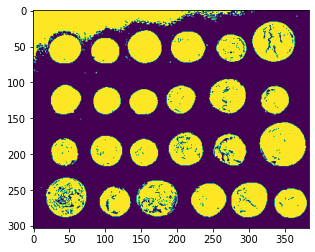

In [228]:
plt.imshow(img)

In [229]:
img

array([[False,  True,  True, ..., False, False, False],
       [False,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

---

In [254]:
label_img = label(img_np)

In [255]:
np.unique(label_img)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [257]:
from skimage.measure import regionprops_table

In [261]:
props = pd.DataFrame(regionprops_table(label_img, properties=['label', "area", "convex_area", "eccentricity", "equivalent_diameter", "major_axis_length", "minor_axis_length", "perimeter"]))
props['circularity'] = 4 * props.area * np.pi / props.perimeter ** 2
props

,label,area,convex_area,eccentricity,equivalent_diameter,major_axis_length,minor_axis_length,perimeter,circularity
0,1,6059,6647,0.615269,87.832559,100.735769,79.411777,326.776695,0.713031
1,2,8860,9663,0.211285,106.211592,108.662199,106.209088,401.374675,0.691104
2,3,5777,6408,0.415282,85.764240,91.251193,83.010534,322.326948,0.698745
3,4,7191,7687,0.626475,95.686287,109.626268,85.447294,346.977705,0.750578
4,5,5986,6205,0.489948,87.301844,94.101408,82.033072,304.249783,0.812617
5,6,8685,8940,0.461768,105.157432,112.107558,99.439494,369.362482,0.799971
6,7,10736,11279,0.470634,116.916636,125.311490,110.565928,418.717821,0.769502
7,8,2738,2830,0.484185,59.043457,63.456804,55.522528,205.480231,0.814898
8,9,4779,5338,0.550523,78.005204,87.586714,73.119162,301.113744,0.662347
9,10,905,965,0.827926,33.945276,45.667351,25.611972,124.882251,0.729217
